# The affect of a good goalie in the NHL 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

For this project, I selected a Kaggle dataset with information collected on hundreds of Goalies in the NHL.  The dataset is quite extensive.  It has over 13,000 rows with data across 19 columns.  This dataset highlights game data with a focus on comparing the performance of goalies in the NHL, by comparing variables such as shots taken against, shots saved, playing time on ice, power play save percentage, short handed saves and even saves, and the overall save percentage.  The dataset is organized by game id and player id, and gives us the relevant data points for the two opposing goalies of each game.  It also gives us the end game results.  This data is significant because it can possibly help us understand the differences in the performance levels, if any, of the goalies in the NHL, and how that affects the end game result.   

The following is a portion of the entire dataset.

In [2]:
df = pd.read_csv("goalie_data.csv")
df = df.drop_duplicates()
df = df.dropna()
print(df.head())


      game_id  player_id  team_id  timeOnIce  assists  goals  pim  shots  \
0  2012030221    8468685        3       4540        0      0    0     48   
1  2012030221    8471695        6       4540        0      0    0     35   
2  2012030222    8468685        3       3600        0      0    0     32   
3  2012030222    8471695        6       3600        0      0    0     37   
4  2012030223    8471695        6       3600        0      0    0     24   

   saves  powerPlaySaves  shortHandedSaves  evenSaves  \
0     45              10                 1         34   
1     33               3                 0         30   
2     27               1                 2         24   
3     35               7                 1         27   
4     23               2                 0         21   

   shortHandedShotsAgainst  evenShotsAgainst  powerPlayShotsAgainst decision  \
0                        1                36                     11        L   
1                        0              

## Question 1:

## Does the number of saves a goalie has over the course of a game depend on how much playing time he is given on the ice? 

We start our analysis by understanding the relationship between the number of saves a goalie is able to have during a game, and the time that goalie spends playing in the game.  This is important because we want to make sure that the game data we have is based on giving a fair and equal chance to every goalie.  It also helps us see if there are any outliers in our data.  Do some goalies that spend relatively few time playing on the ice, have a higher number of saves, and possibly a higher save percentage?

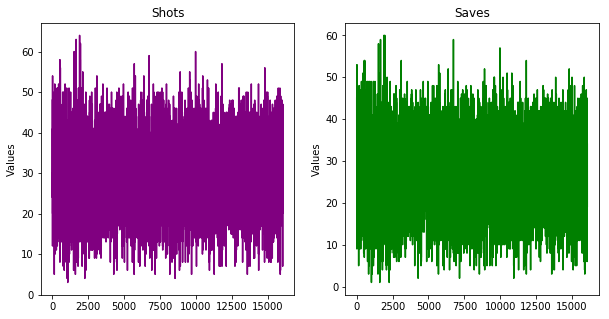

In [3]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(df['shots'], color='purple')
plt.ylabel('Values')
plt.title('Shots')

plt.subplot(1, 2, 2)
plt.plot(df['saves'], color='green')
plt.ylabel('Values')
plt.title('Saves')


plt.show()

In [4]:
average_shots = df['shots'].mean()
average_saves = df['saves'].mean()
shots_std = df['shots'].std()
saves_std = df['saves'].std()

print("Average shots against goalies: " + str(average_shots))
print("The standard devition of the average shots is: " + str(shots_std))
print("Average saves: " + str(average_saves))
print("The standard deviation from the average saves is: " + str(saves_std))

Average shots against goalies: 29.701480563051565
The standard devition of the average shots is: 7.359771782886752
Average saves: 27.199183137626722
The standard deviation from the average saves is: 7.382253598159445


First, I made two line plots (shown above).  The two line plots show that the number of saves a goalie in the NHL makes, is linked to, but of course less than the number of shots taken against him.  This visulaization also confirms that there aren't any irregularities in these two data points, which is important because alot of the data is dependant on these two data points.  It would have been weird if one player had more saves than the shots that were taken against him in any given game.  The average number of shots against a goalie is 29.7, and the average number of saves is 27.19.  The standard deviation for the average number of shots against a goalie is 7.35, suggesting that the data is not so wide spread.


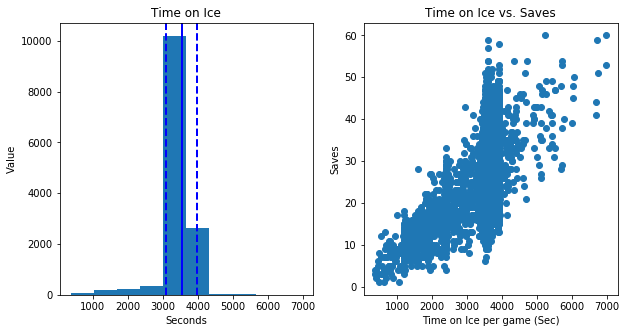

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['timeOnIce'])
plt.axvline(df['timeOnIce'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['timeOnIce'].mean() + df['timeOnIce'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['timeOnIce'].mean()-df['timeOnIce'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.title("Time on Ice")
plt.xlabel("Seconds")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.scatter(x=df['timeOnIce'], y=df['saves'])
plt.xlabel("Time on Ice per game (Sec)")
plt.ylabel("Saves")
plt.title('Time on Ice vs. Saves')

plt.show()

In [6]:
time_mean = df['timeOnIce'].mean()
time_std = df['timeOnIce'].std()

print("The average time on ice was " + str(time_mean) + " seconds per game.")
print("Standard deviation from the average was " + str(time_std))

The average time on ice was 3537.593975639997 seconds per game.
Standard deviation from the average was 447.7296685119577


Than to answer the first question, I wanted to show if there is any consistency in the amount of time goalies spend on the ice, and how that correlates to saves.  The first plot is a histograph (above) of the "Time on ice" for each goalie.  It shows that the majority of goalies in the NHL played an average of 3537.59 seconds in a game.  From this we can infer that in general that the data set we have is fair in its assessment, and that there is no bias towards some goalies data points because of an unfair advantage in playing time on ice. 

The scatter plot next to the histograph on the right positively correlates the amount of playing time on ice to the number of saves a goalie has over the course of a game.  Aside from a few outliers, this shows that there aren't any irregularities to suggest that the play level of the goalies in the NHL vary greatly.  The more a goalie plays, the more saves he will have.

## Question 2:

## How do factors that are outside a goalie's control affect his overall save percentage per game?

To answer this question, I made a histograph and scatter plot (below) to demonstrate the relationship between the "power play shots against" a goalie during a game and his save percentage for that game.  A power play in hockey is when one team has more players on the ice (due to a penalty given to the other team) and uses its higher number of players on the ice to attack the goal.  Here in this example, a penalty given to a team due to an error caused by a player on the team would be considered a factor outside a goalie's control.

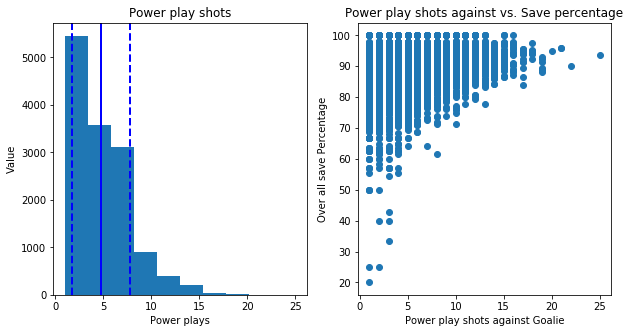

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['powerPlayShotsAgainst'])
plt.axvline(df['powerPlayShotsAgainst'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['powerPlayShotsAgainst'].mean() + df['powerPlayShotsAgainst'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['powerPlayShotsAgainst'].mean()-df['powerPlayShotsAgainst'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.title("Power play shots")
plt.xlabel("Power plays")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.scatter(x=df['powerPlayShotsAgainst'], y=df['savePercentage'])
plt.xlabel("Power play shots against Goalie")
plt.ylabel("Over all save Percentage")
plt.title('Power play shots against vs. Save percentage')

plt.show()

In [8]:
powerplay_average = df['powerPlayShotsAgainst'].mean()
powerplay_std = df['powerPlayShotsAgainst'].std()
print("The average number of power plays per goalies was " + str(powerplay_average) + " per game.")
print("The standard deviation from the average is " + str(powerplay_std))

The average number of power plays per goalies was 4.771643206184815 per game.
The standard deviation from the average is 2.9794581779539753


This histograph above shows that the goalies faced an average of 4.77 powerplay shots. 

The purpose of the scatter plot on the right of the historgraph was to show how factors that a goalie has no control over, such as penalties given to other players on their respective teams, may affect his overall save percentage.  

The scatter plot shows that there is alot of variability between these two data points.  Facing a low number of power plays does not necessarily mean that a goalie will have a high overall save percentage, and vis-a-versa.  In fact, the scatter plot suggests that in some instances goalies had a game with an unusually high number of power shots taken against them, but still had a high save percentage for that game.  This suggests that some goalie's are better than others at defending against power plays that come at them, possibly due to a quicker reflex or more athleticism that help them in these high pressure situations.

Aside from this, we can conclude that in geneal there is no real meaningful affect from a goalie's non controllable factors during the game, on his overall save percentage per game. 

## Question 3:

## Are the chances of winning a game dependent upon the goalies having a high save percentage?  Another way to phrase this question is, does a good goalie make a difference in winning, or does a good offense matter more?  

This is a commmon debate amongst sports enthsiaists, and I though it might be worth while put this debate in perspective based on to answer given the data we have from the NHL. I made a graph below with two histograms

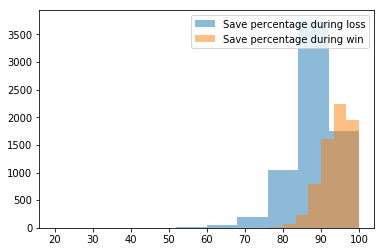

In [9]:
loss_df = df[df['decision'] == 'L']
win_df = df[df['decision'] == 'W']
loss_saves = loss_df['savePercentage']
win_saves = win_df['savePercentage']
plt.hist(loss_saves, alpha=0.5, label='Save percentage during loss')
plt.hist(win_saves, alpha=0.5, label='Save percentage during win')
plt.legend(loc='upper right') 
plt.show()

In [10]:
loss_percent = loss_df['savePercentage'].mean()
print("The average save percentage of the goalies that lost the games is: " + str(loss_percent))

The average save percentage of the goalies that lost the games is: 87.88500425431008


In [11]:
win_percent = win_df['savePercentage'].mean()
print("The average save percentage of the goalies that won the games is: " + str(win_percent))

The average save percentage of the goalies that won the games is: 94.10077100018971


To answer this question, I filtered the dataframe according to wins and losses.  Than, I created a histogram of the "savePercentages" column from each of the filterd dataframes, and also took the mean (average) of that column from each of the dataframes.  

There is a slight difference between the save percentage of goalies that won and the goalies that lost the game.  The goalies that won the game had an average save percentage of 94.1.  The goalies that lost the game had an average save percentage of 87.885, which is about 6 percentage points below.  This would suggest that a goalie's save percentage doesn't make a difference.  Also, if we look at the two histographs above, we see that alot of the data values regarding the save percentages of goalies in the winning and losing side overlap, that is to say that the performance of the goalies on opposing sides of a game in many instances is very similar.    

With this information, I can answer question 3, by suggesting that a good goalie only makes a slight difference in the end result of the game.   To make a broader conclusion, I would say that defense will not be the deciding factor in winning a game; instead a team will also need to have a potent offense that can get more goals by taking more shots and having more scoring attempts then the opposing team, to win the game.  

Further research on the differences in the offensive abilities of different teams in the NHL would be needed to see how much offense actually makes a difference in winning games.  We could analyse the average number of goals scored per game by the top 5 or 6 teams and compare them to the teams with the worst records in the NHL.  We could also analyze the number of shot attempts the top ranking teams make during a game, and see how that compares to the shot attempts taken by teams that are ranked lower.
